In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Loan approval prediction.csv")
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


# Exploratory Data Analysis

In [3]:
df.shape

(58645, 13)

In [4]:
df.columns.tolist()

['id',
 'person_age',
 'person_income',
 'person_home_ownership',
 'person_emp_length',
 'loan_intent',
 'loan_grade',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_default_on_file',
 'cb_person_cred_hist_length',
 'loan_status']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          58645 non-null  int64  
 1   person_age                  58645 non-null  int64  
 2   person_income               58645 non-null  int64  
 3   person_home_ownership       58645 non-null  object 
 4   person_emp_length           58645 non-null  float64
 5   loan_intent                 58645 non-null  object 
 6   loan_grade                  58645 non-null  object 
 7   loan_amnt                   58645 non-null  int64  
 8   loan_int_rate               58645 non-null  float64
 9   loan_percent_income         58645 non-null  float64
 10  cb_person_default_on_file   58645 non-null  object 
 11  cb_person_cred_hist_length  58645 non-null  int64  
 12  loan_status                 58645 non-null  int64  
dtypes: float64(3), int64(6), object

In [6]:
df.describe()

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status
count,58645.000000,58645.000000,5.864500e+04,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000,58645.000000
mean,29322.000000,27.550857,6.404617e+04,4.701015,9217.556518,10.677874,0.159238,5.813556,0.142382
std,16929.497605,6.033216,3.793111e+04,3.959784,5563.807384,3.034697,0.091692,4.029196,0.349445
min,0.000000,20.000000,4.200000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,0.000000
25%,14661.000000,23.000000,4.200000e+04,2.000000,5000.000000,7.880000,0.090000,3.000000,0.000000
50%,29322.000000,26.000000,5.800000e+04,4.000000,8000.000000,10.750000,0.140000,4.000000,0.000000
75%,43983.000000,30.000000,7.560000e+04,7.000000,12000.000000,12.990000,0.210000,8.000000,0.000000
max,58644.000000,123.000000,1.900000e+06,123.000000,35000.000000,23.220000,0.830000,30.000000,1.000000


In [7]:
df.isna().sum()

id                            0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [8]:
df.duplicated().value_counts()

False    58645
Name: count, dtype: int64

### What can we conclude?
- Here, we can see that majority of the income falls under a small range between $30,000 and about $100,000 a year.

- Individuals with older ages (above 60) show greater variance in income for both loan statuses.

- Another weird thing that the graph indicates is that the people who didn't get a loan approval tend to have higher incomes across most age groups.

- At extremely high ages (above 80), there are unusual data points where income spikes for both categories, but these are likely outliers or rare cases in the data.

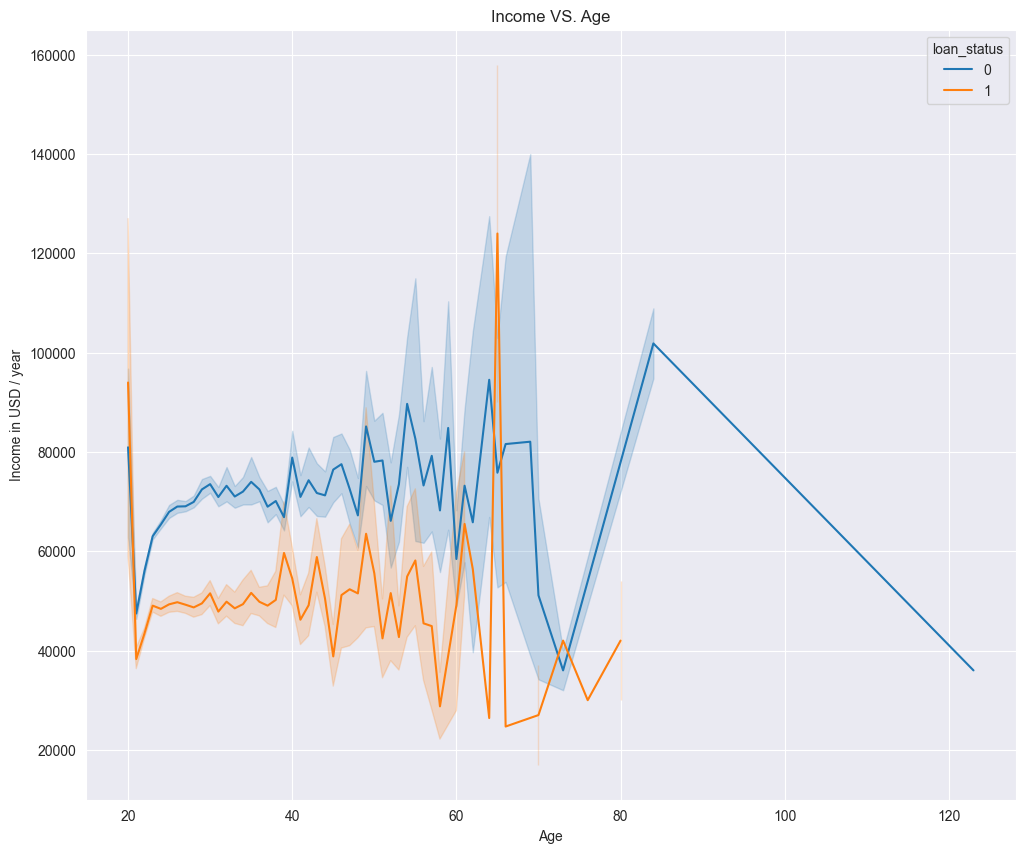

In [9]:
plt.figure(figsize=(12,10))
sns.set_style("darkgrid")

ax = sns.lineplot(x = "person_age", 
                    y = "person_income", 
                    data = df, 
                    hue = "loan_status"
                    )

plt.title("Income VS. Age")
plt.xlabel("Age")
plt.ylabel("Income in USD / year")
plt.show()

### The intenstion of this bar chart was to identify what was the leading cause for applying for loans. What was found:
- There is <u>**no**</u> major leading cause for the loan applications.

- The lowest accepted categories by far were "Venture" & "Home Improvement".

- The lowest category in terms of total loan applications is "Home Improvement".


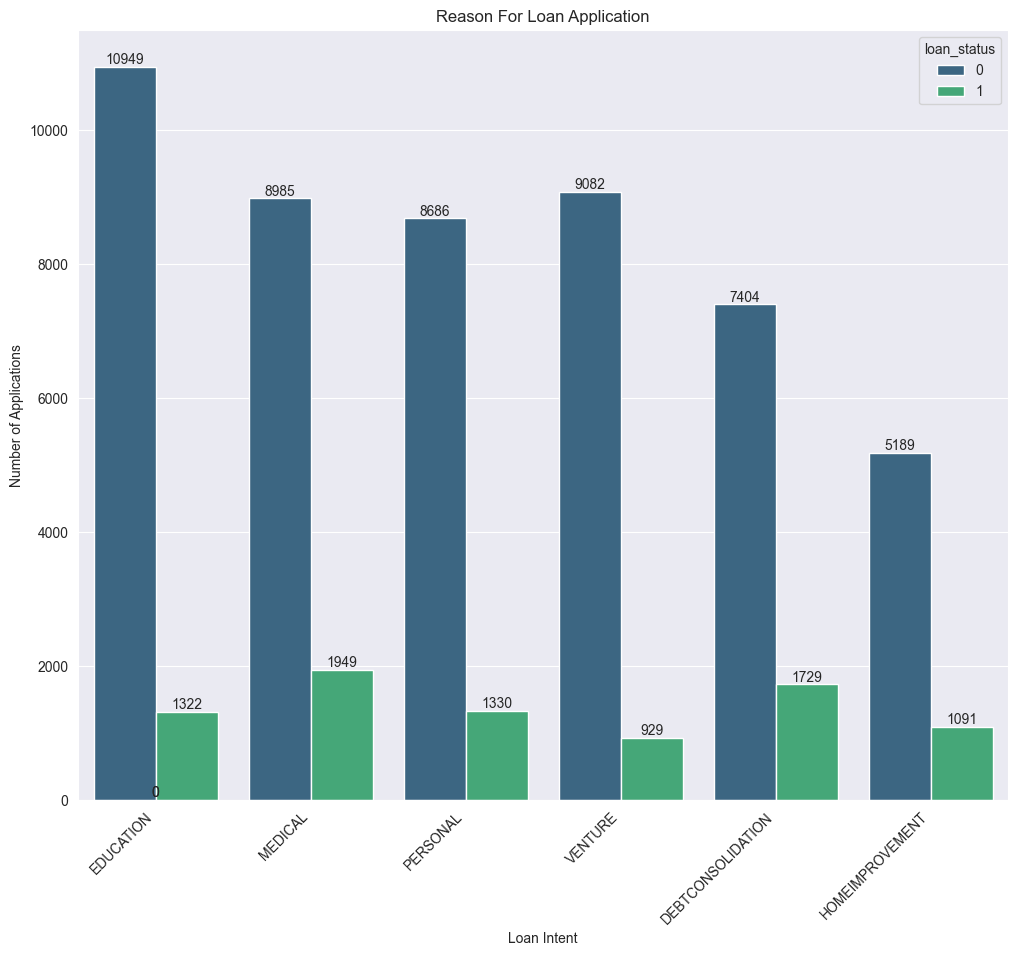

In [10]:
plt.figure(figsize=(12, 10))
sns.set_style("darkgrid")

ax = sns.countplot(x="loan_intent", data=df, hue="loan_status", palette="viridis")

for p in ax.patches:
    height = p.get_height()  
    ax.text(
        p.get_x() + p.get_width() / 2,  
        height + 0.1,  
        str(int(height)),  
        ha='center',  
        va='bottom'  
    )

ax.set_xlabel("Loan Intent")
ax.set_ylabel("Number of Applications")
ax.set_xticks(range(len(df['loan_intent'].unique())))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Reason For Loan Application")

plt.show()


### A lot of Effective pieces of information could be gained:
- Only a small portion of the applicants are actual <u>**Owners**</u> of a house, which could indicate that the applicants that have a "Mortage" haven't still payed it fully.

- The "Other" category are so low in amount and could be neglected and removed from the dataset to avoid any problems during modelling.

- Home owners don't usually tend to apply for loans.

- Over 81% of the total approved loans were for the applicants that <u>**Rent**</u> and about 18% of total approved loans were for applicants that own a <u>**Mortage**</u>.

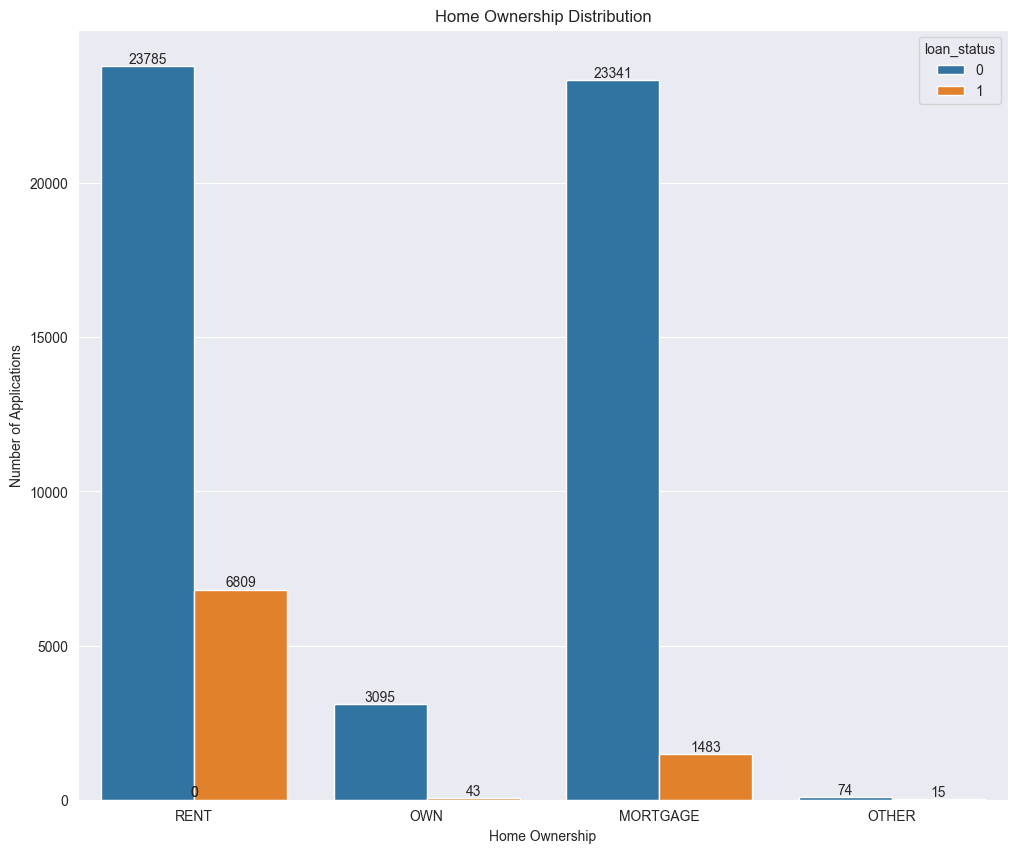

In [11]:
plt.figure(figsize=(12, 10))
sns.set_style("darkgrid")

ax = sns.countplot(x="person_home_ownership", data=df, hue="loan_status")

for p in ax.patches:
    height = p.get_height()  
    ax.text(
        p.get_x() + p.get_width() / 2,  
        height + 0.1,  
        str(int(height)),  
        ha='center',  
        va='bottom'  
    )

ax.set_xlabel("Home Ownership")
ax.set_ylabel("Number of Applications")
ax.set_xticks(range(len(df['person_home_ownership'].unique())))
plt.title("Home Ownership Distribution")

plt.show()


### What does this distributed graph shows?
- Each Grade has its own range of loan interest rate:
    - <u>Grade A</u> : ***5% - 10%***
    - <u>Grade B</u> : ***10% - 12.5%***
    - <u>Grade C</u> : ***12.5% - 15.5%***
    - <u>Grade D</u> : ***13% - 17.5%***
    - <u>Grade E</u> : ***14% - 20%***
    - <u>Grade F</u> : ***15% - 21%***
    - <u>Grade G</u> : ***Above 20%***
- Almost no Grade E, F and G have approved loans
- Grades B and D have the most approved loans
- Grade A loans has the highest number of rejected loans.

- About ratio between count and approval:
    - Grade D has the best [reject : approve] ratio about **2:3**
    - Grade A has the worst [reject : approve] ratio about **20:1**

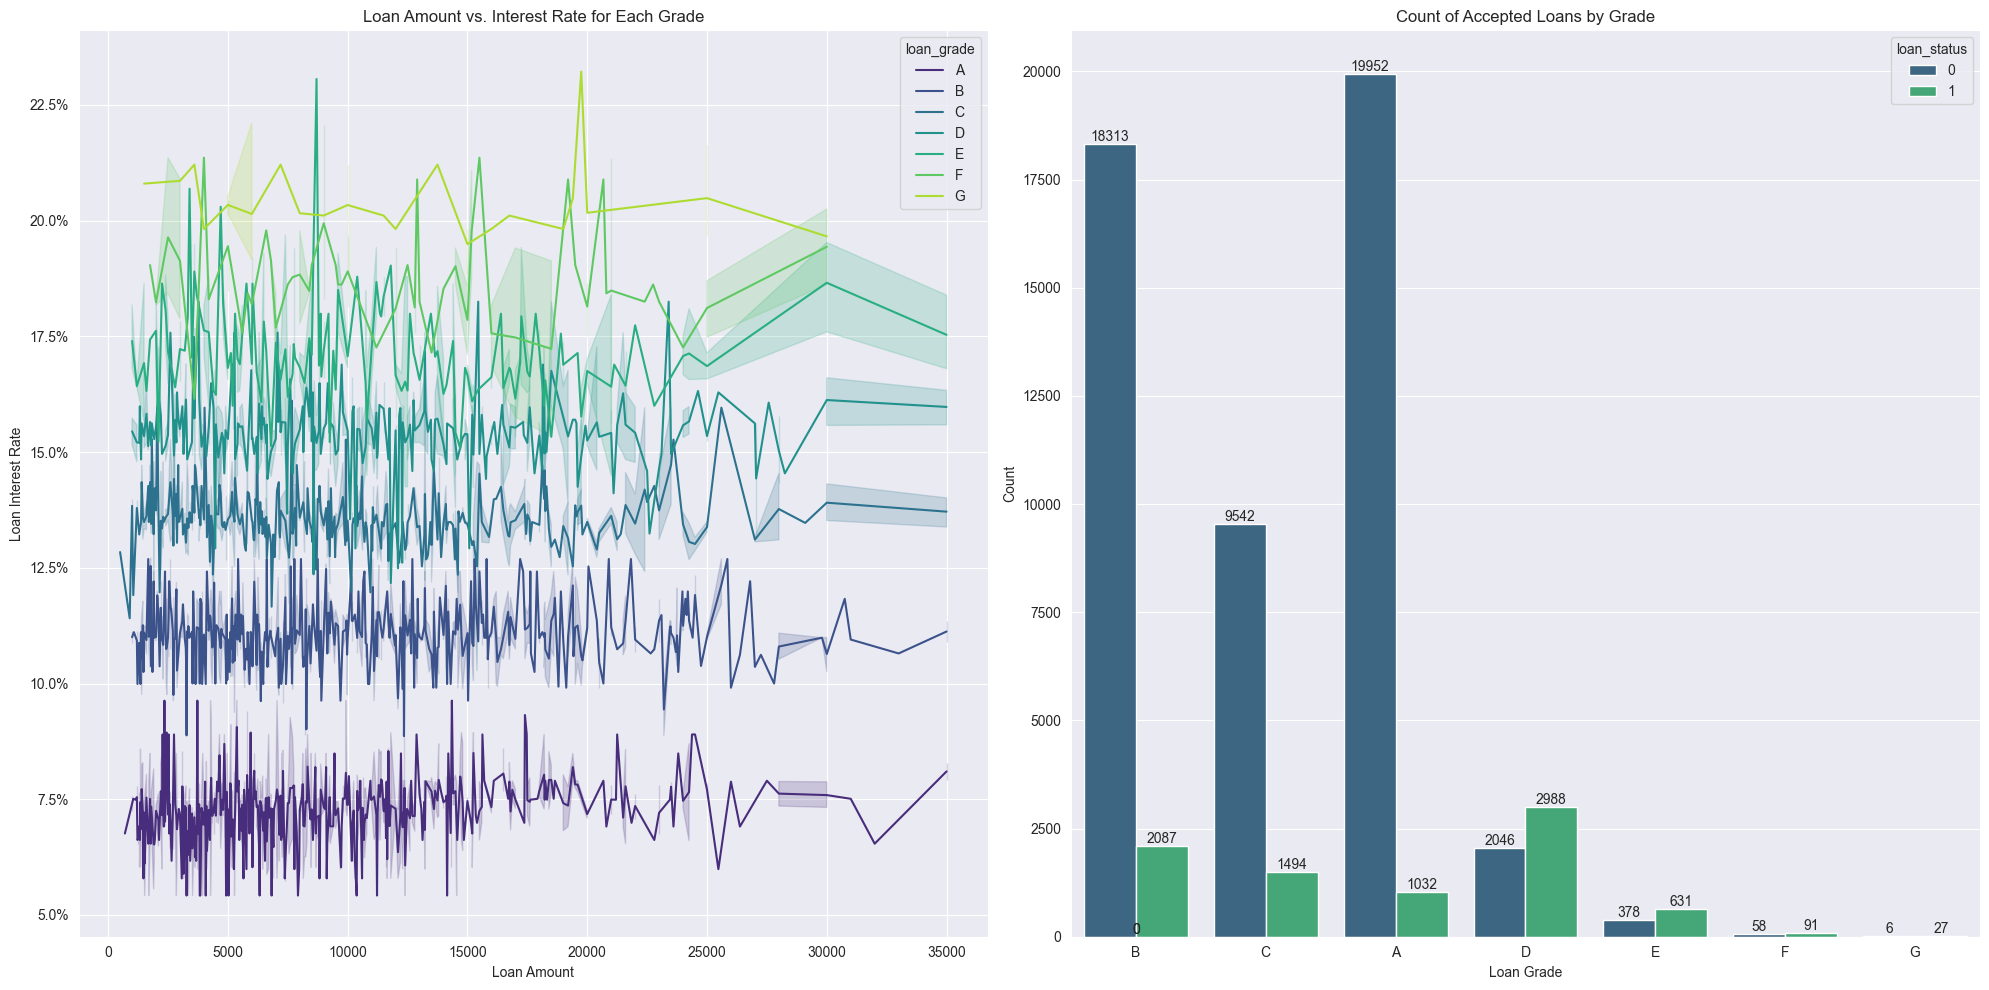

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

sns.set_style("darkgrid")

# First plot: Lineplot showing loan amount vs. interest rate for each grade
loan_grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.lineplot(x="loan_amnt", y="loan_int_rate", data=df, hue="loan_grade", 
             palette="viridis", hue_order=loan_grade_order, ax=axes[0])

axes[0].set_title("Loan Amount vs. Interest Rate for Each Grade")
axes[0].set_xlabel("Loan Amount")
axes[0].set_ylabel("Loan Interest Rate")

axes[0].yaxis.set_major_formatter(mticker.PercentFormatter(100.0))

# Second plot: Countplot showing the count of accepted loans for each grade
sns.countplot(x="loan_grade", data=df, hue="loan_status", palette="viridis", ax=axes[1])

# Add count labels on top of the bars
for p in axes[1].patches:
    height = p.get_height()  
    axes[1].text(
        p.get_x() + p.get_width() / 2,  
        height + 0.1,  
        str(int(height)),  
        ha='center',  
        va='bottom' 
    )

axes[1].set_title("Count of Accepted Loans by Grade")
axes[1].set_xlabel("Loan Grade")
axes[1].set_ylabel("Count")

plt.tight_layout()

plt.show()

### While there are numerous outliers, the scatter plot shows a clear trend:
- Citizens with greater age have more credit history length due to the longer duration that they have lived.

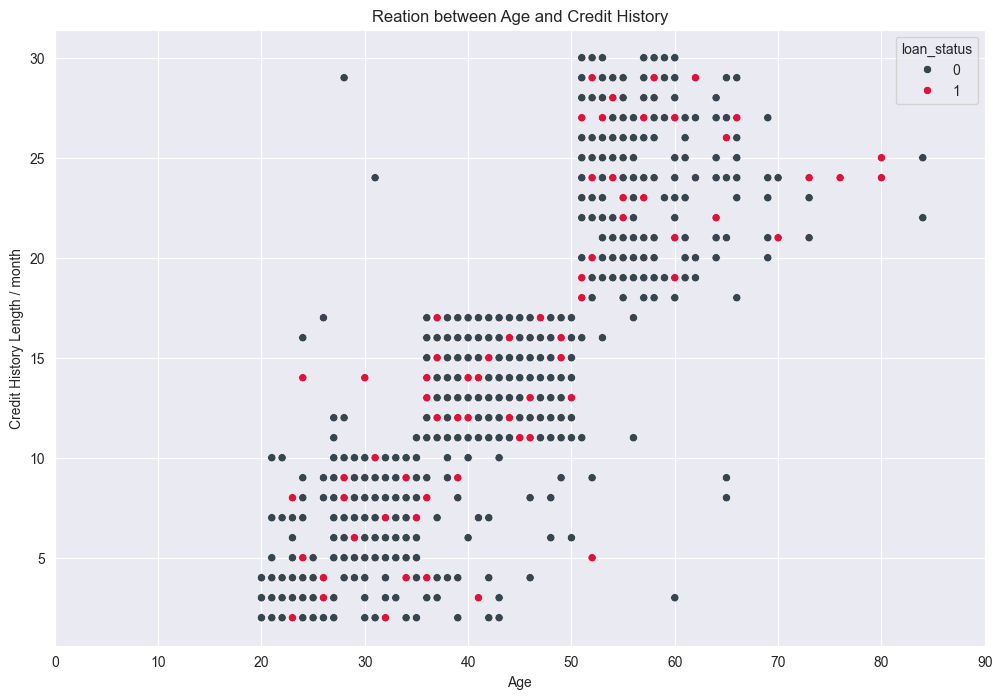

In [13]:
plt.figure(figsize=(12,8))
sns.set_style("darkgrid")

sns.scatterplot(x = "person_age", y = "cb_person_cred_hist_length", data = df, hue = "loan_status", palette={0:"#36454F", 1:"crimson"})

plt.xlim(0, 90)
plt.title("Reation between Age and Credit History")
plt.xlabel("Age")
plt.ylabel("Credit History Length / month")

plt.show()

### The reationship is furthermore shown in a more clear manner in this plot.

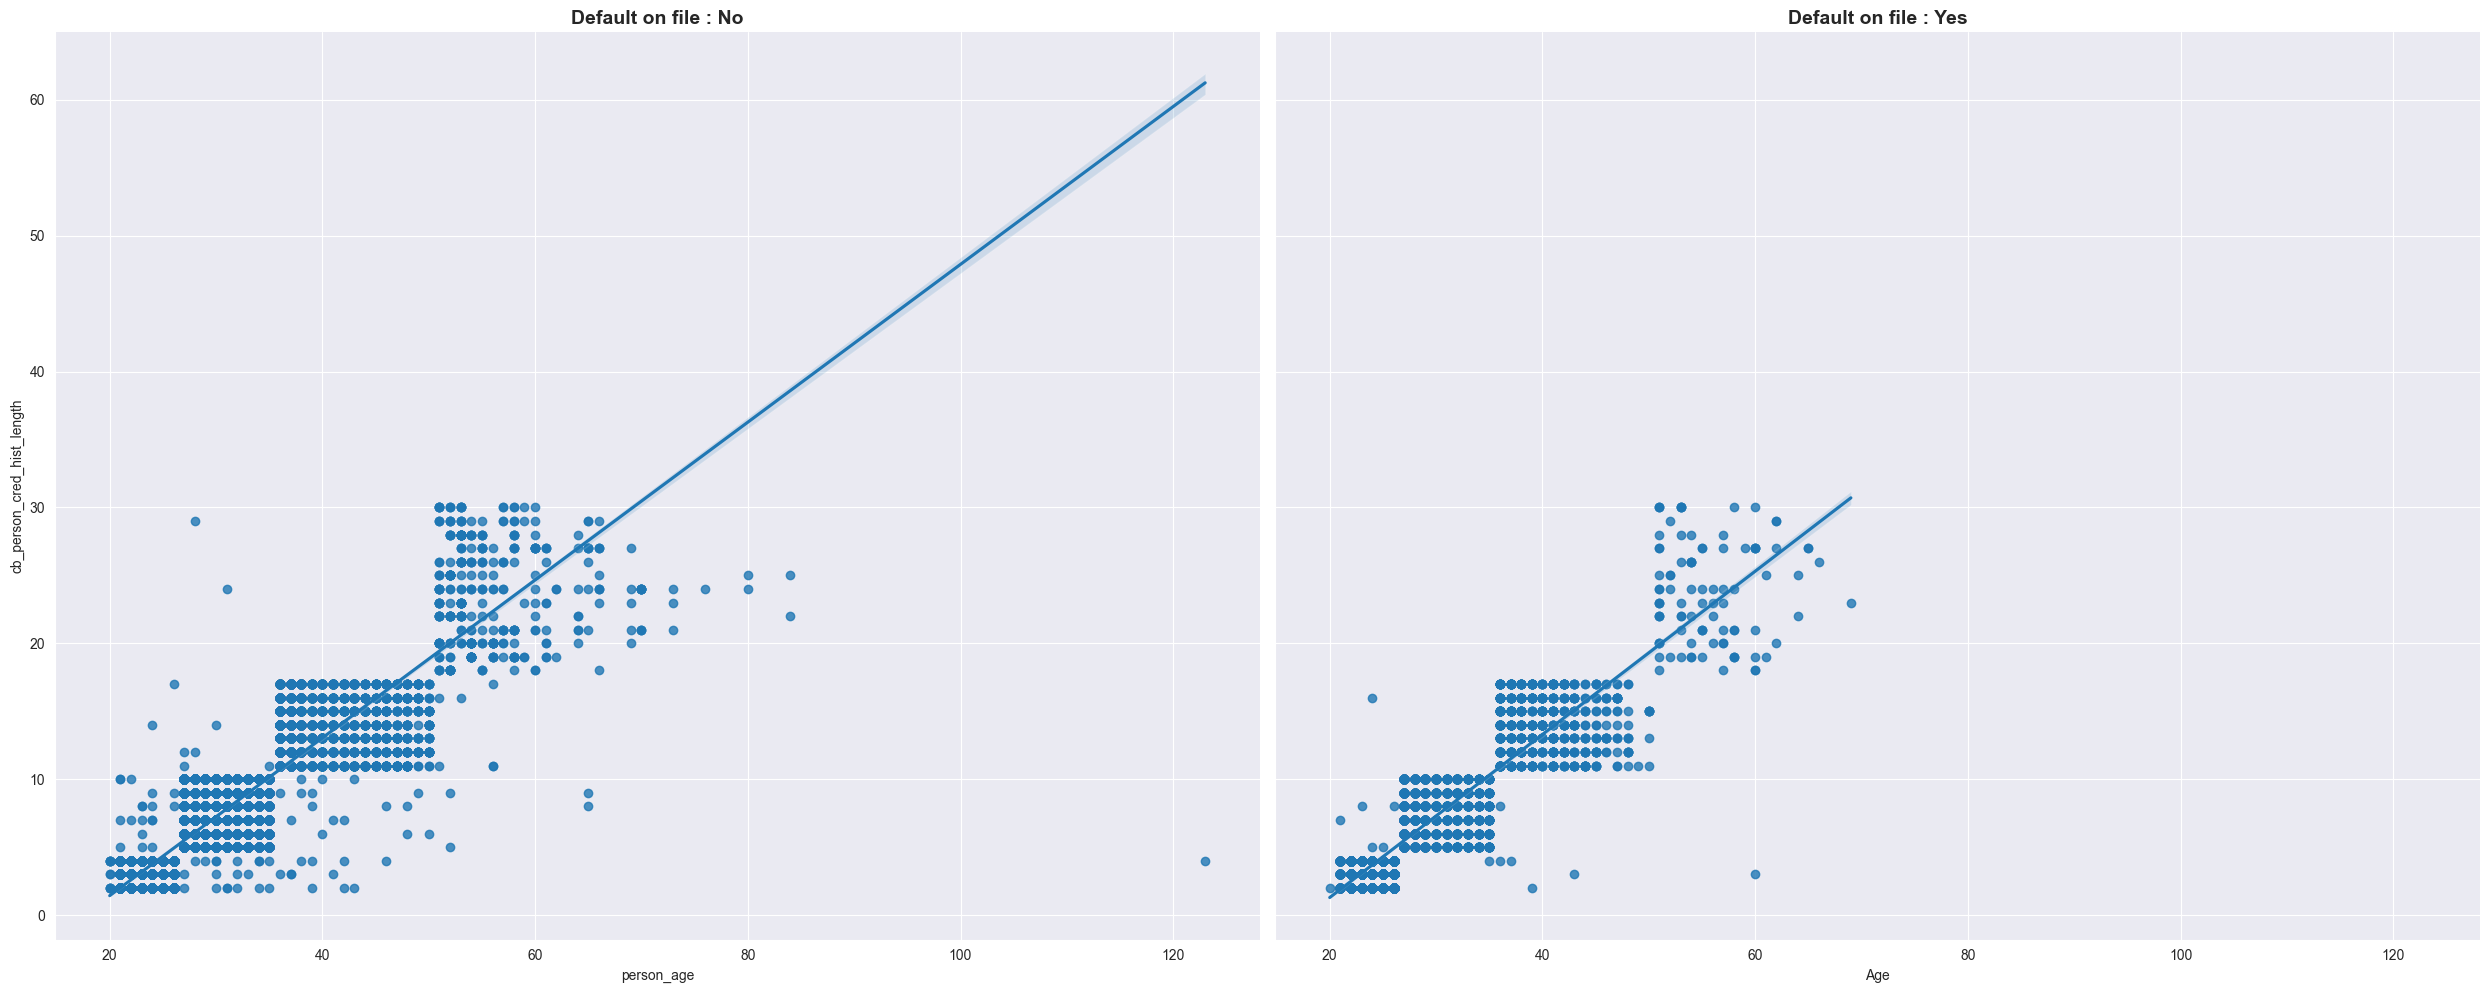

In [14]:
ax = sns.lmplot(x = "person_age", y = "cb_person_cred_hist_length", data = df, col = "cb_person_default_on_file", col_wrap = 2, height=10, aspect=1.25)

# Set custom titles manually for each subplot
titles = ["Default on file : No", "Default on file : Yes"]  
for axis, title in zip(ax.axes.flat, titles):
    axis.set_title(title, fontsize=14, fontweight='bold')

plt.xlabel("Age")
plt.ylabel("Credit History Length / month")

plt.show()

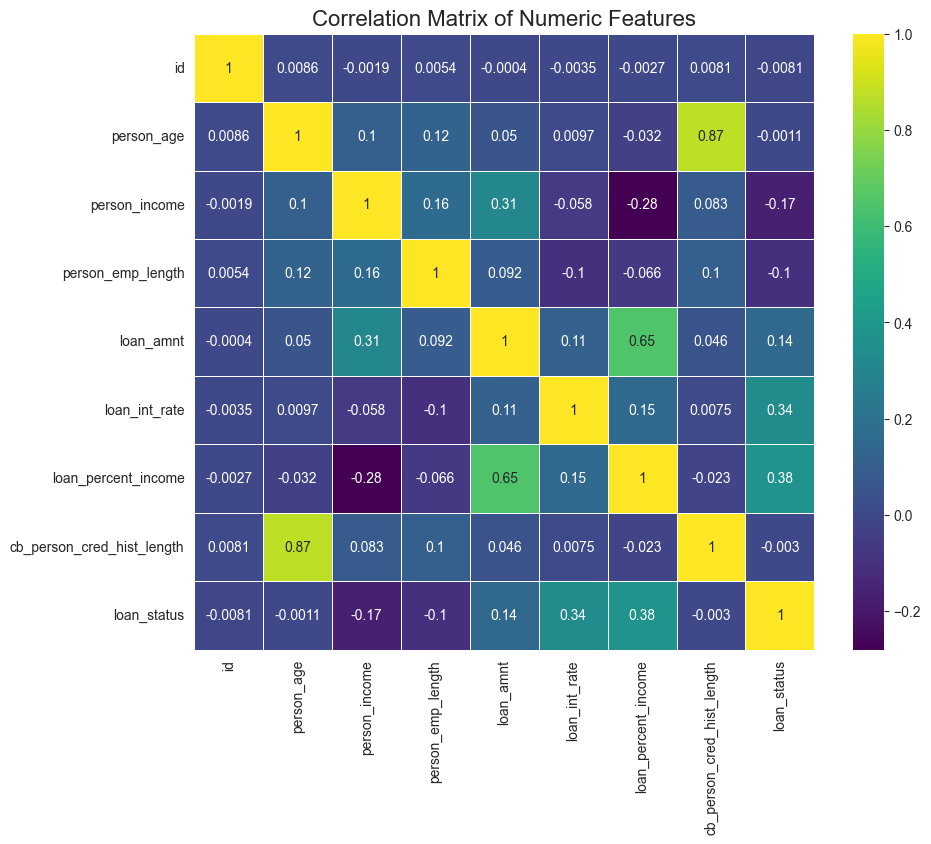

In [15]:
numeric = df.select_dtypes(include=['number'])
correlation_matrix = numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5) 
plt.title('Correlation Matrix of Numeric Features', fontsize=16)
plt.show()

# Data Preprocessing

### Detecting Outliers
The first step before modelling is identifying the outliers in the dataset and removing it.

One of the most popular techniques is to use Interquartile Range (IQR) to identify the upper and lower boundaries.

The second technique also for identifying the outliers is Z-Score.


In [16]:
df.head()

,id,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,0,37,35000,RENT,0.0,EDUCATION,B,6000,11.49,0.17,N,14,0
1,1,22,56000,OWN,6.0,MEDICAL,C,4000,13.35,0.07,N,2,0
2,2,29,28800,OWN,8.0,PERSONAL,A,6000,8.90,0.21,N,10,0
3,3,30,70000,RENT,14.0,VENTURE,B,12000,11.11,0.17,N,5,0
4,4,22,60000,RENT,2.0,MEDICAL,A,6000,6.92,0.10,N,3,0


In [17]:
df.drop(columns=["id"], inplace = True)

In [18]:
df.rename(columns=lambda x: x.strip(), inplace=True)
print(df.columns)

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_default_on_file',
       'cb_person_cred_hist_length', 'loan_status'],
      dtype='object')


In [19]:
numeric = df.select_dtypes(include=['number'])
numeric_columns = numeric.columns.tolist()

In [20]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bounds = Q1 - 1.5 * IQR
    upper_bounds = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bounds) | (df[column] > upper_bounds)]
    return outliers

outliers_iqr = {col: detect_outliers_iqr(df, col) for col in numeric_columns}
print("Outlier: ", len(outliers_iqr))

Outlier:  8


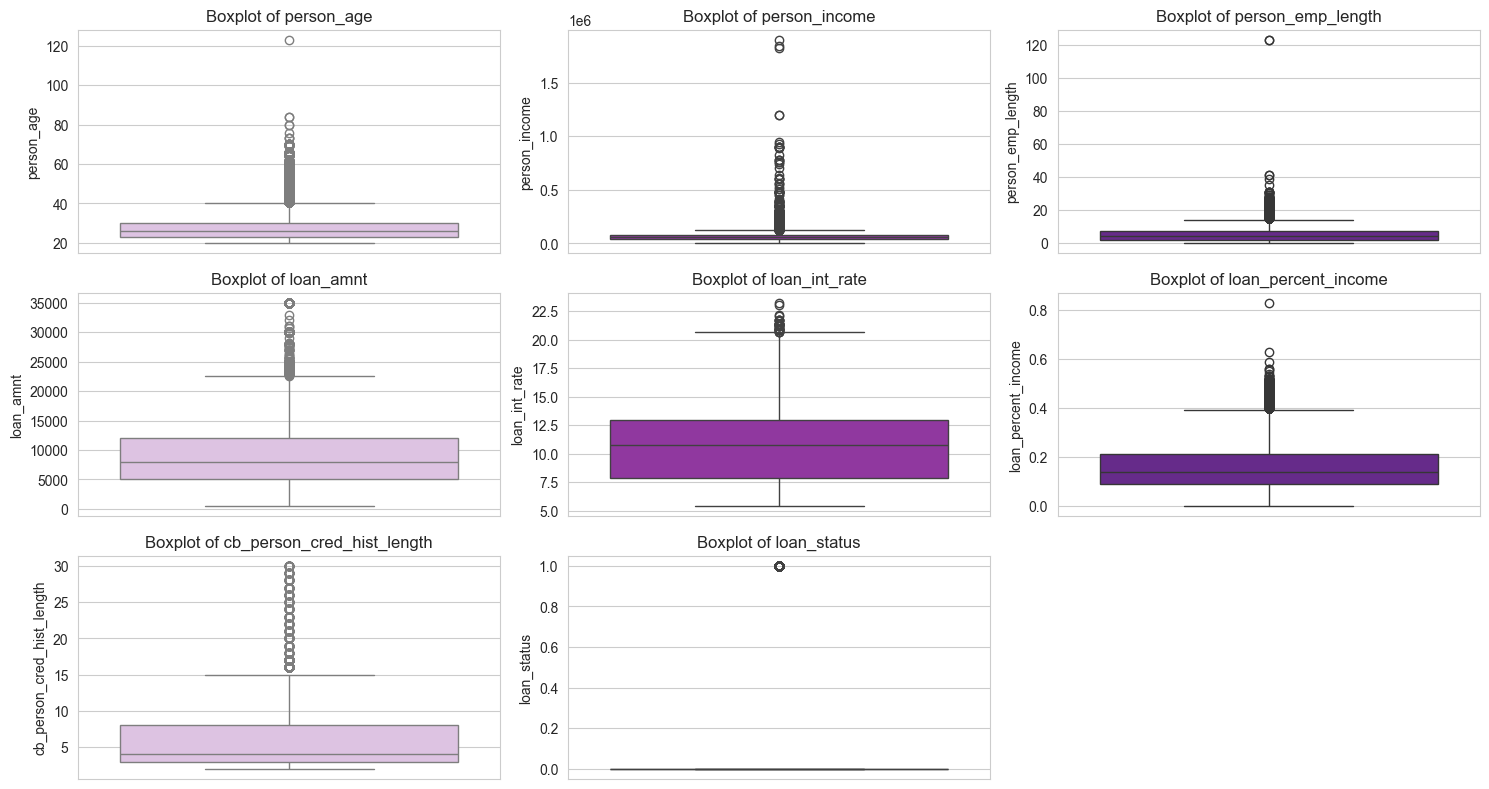

In [21]:
sns.set_style(style="whitegrid")
custom_palette = sns.color_palette(["#e1bee7", "#9c27b0", "#6a1b9a"])

def plot_boxplots(df, columns):
    plt.figure(figsize=(15, 8))
    for i, col in enumerate(columns):
        plt.subplot(3, 3, i + 1)
        sns.boxplot(y=df[col], color=custom_palette[i % 3])
        plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

plot_boxplots(df, numeric_columns)

In [22]:
def detect_outliers_zscore(df, columns, threshold=3):
    outlier_indices = []
    for col in columns:
        z_scores = np.abs(stats.zscore(df[col]))
        outlier_indices.extend(np.where(z_scores > threshold)[0])
    return set(outlier_indices)

outliers_zscore = detect_outliers_zscore(df, numeric_columns)
print(f'Number of outliers detected using Z-scores: {len(outliers_zscore)}')

Number of outliers detected using Z-scores: 2835


In [23]:
df.shape

(58645, 12)

In [24]:
df_cleaned = df.drop(index=outliers_zscore)
print(f'Shape of DataFrame after outlier removal: {df_cleaned.shape}')

Shape of DataFrame after outlier removal: (55810, 12)


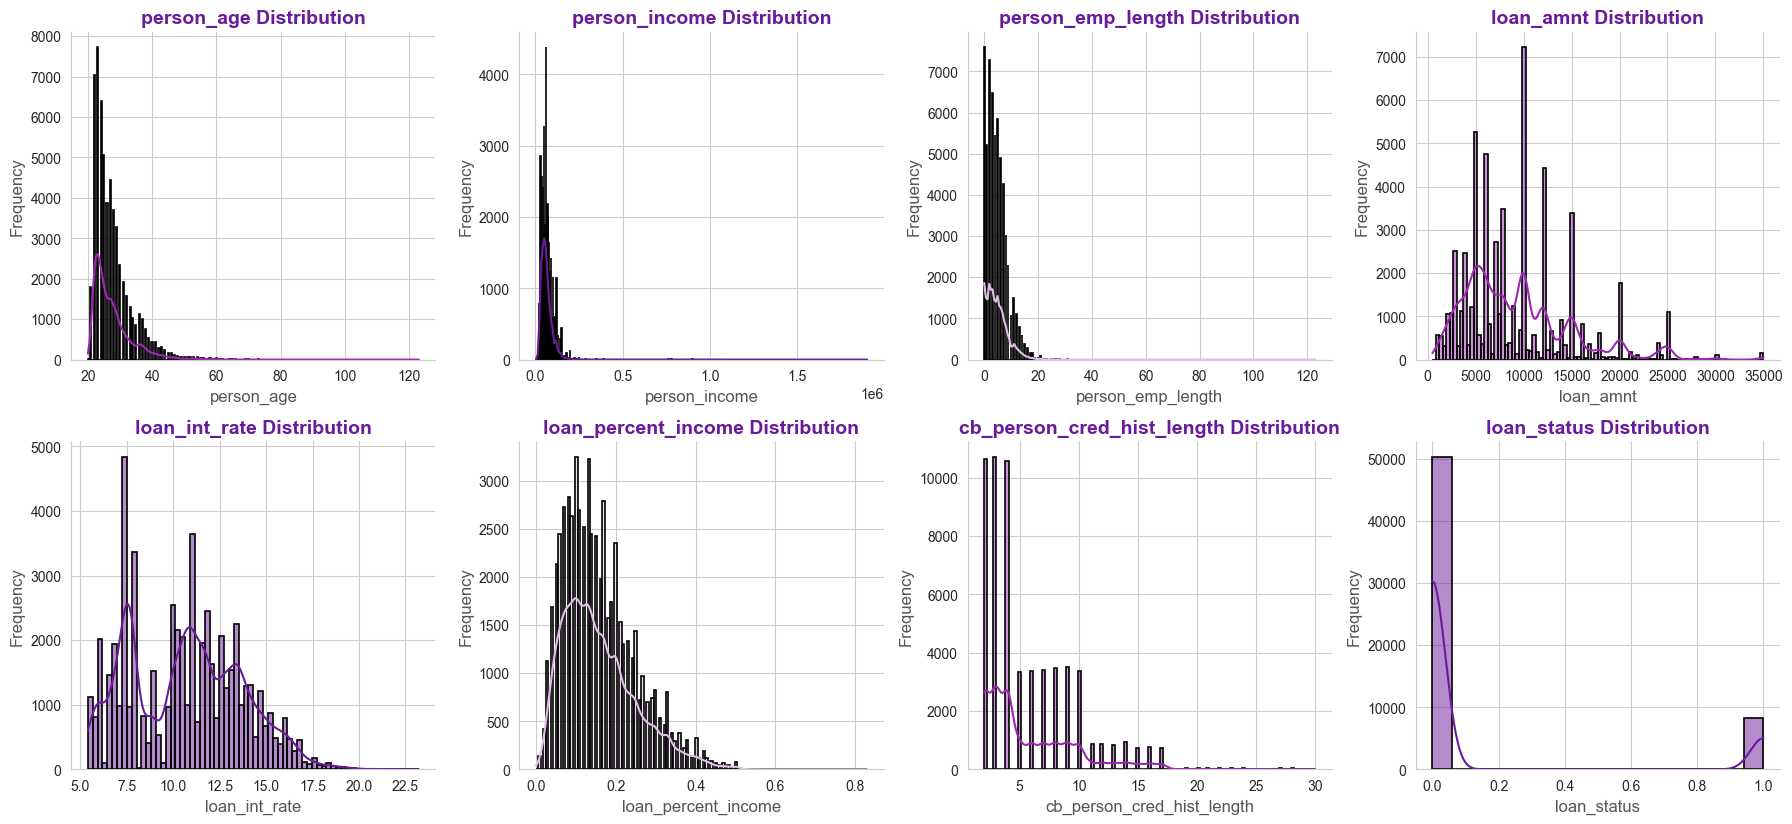

In [25]:
plt.figure(figsize=(18, 12))
custom_palette = sns.color_palette(["#e1bee7", "#9c27b0", "#6a1b9a"])

for idx, col in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns)//3 + 1, 4, idx)  
    sns.histplot(df[col], kde=True, color=custom_palette[idx % 3], edgecolor="black", linewidth=1.2) 
    
    plt.title(f'{col} Distribution', fontsize=14, weight='bold', color="#6a1b9a")
    plt.xlabel(col, fontsize=12, color="#555555")
    plt.ylabel('Frequency', fontsize=12, color="#555555")
    
    sns.despine()

plt.tight_layout()
plt.show()

### Encoding

Label Encoding for binary variables and nominal categorical variables

In [26]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df["cb_person_default_on_file"] = encoder.fit_transform(df["cb_person_default_on_file"])

In [27]:
df = pd.get_dummies(df, columns=["person_home_ownership", "loan_intent", "loan_grade"], drop_first=True)

In [28]:
df.dtypes, df.shape

(person_age                       int64
 person_income                    int64
 person_emp_length              float64
 loan_amnt                        int64
 loan_int_rate                  float64
 loan_percent_income            float64
 cb_person_default_on_file        int64
 cb_person_cred_hist_length       int64
 loan_status                      int64
 person_home_ownership_OTHER       bool
 person_home_ownership_OWN         bool
 person_home_ownership_RENT        bool
 loan_intent_EDUCATION             bool
 loan_intent_HOMEIMPROVEMENT       bool
 loan_intent_MEDICAL               bool
 loan_intent_PERSONAL              bool
 loan_intent_VENTURE               bool
 loan_grade_B                      bool
 loan_grade_C                      bool
 loan_grade_D                      bool
 loan_grade_E                      bool
 loan_grade_F                      bool
 loan_grade_G                      bool
 dtype: object,
 (58645, 23))

#### Calculate the correlation matrix 

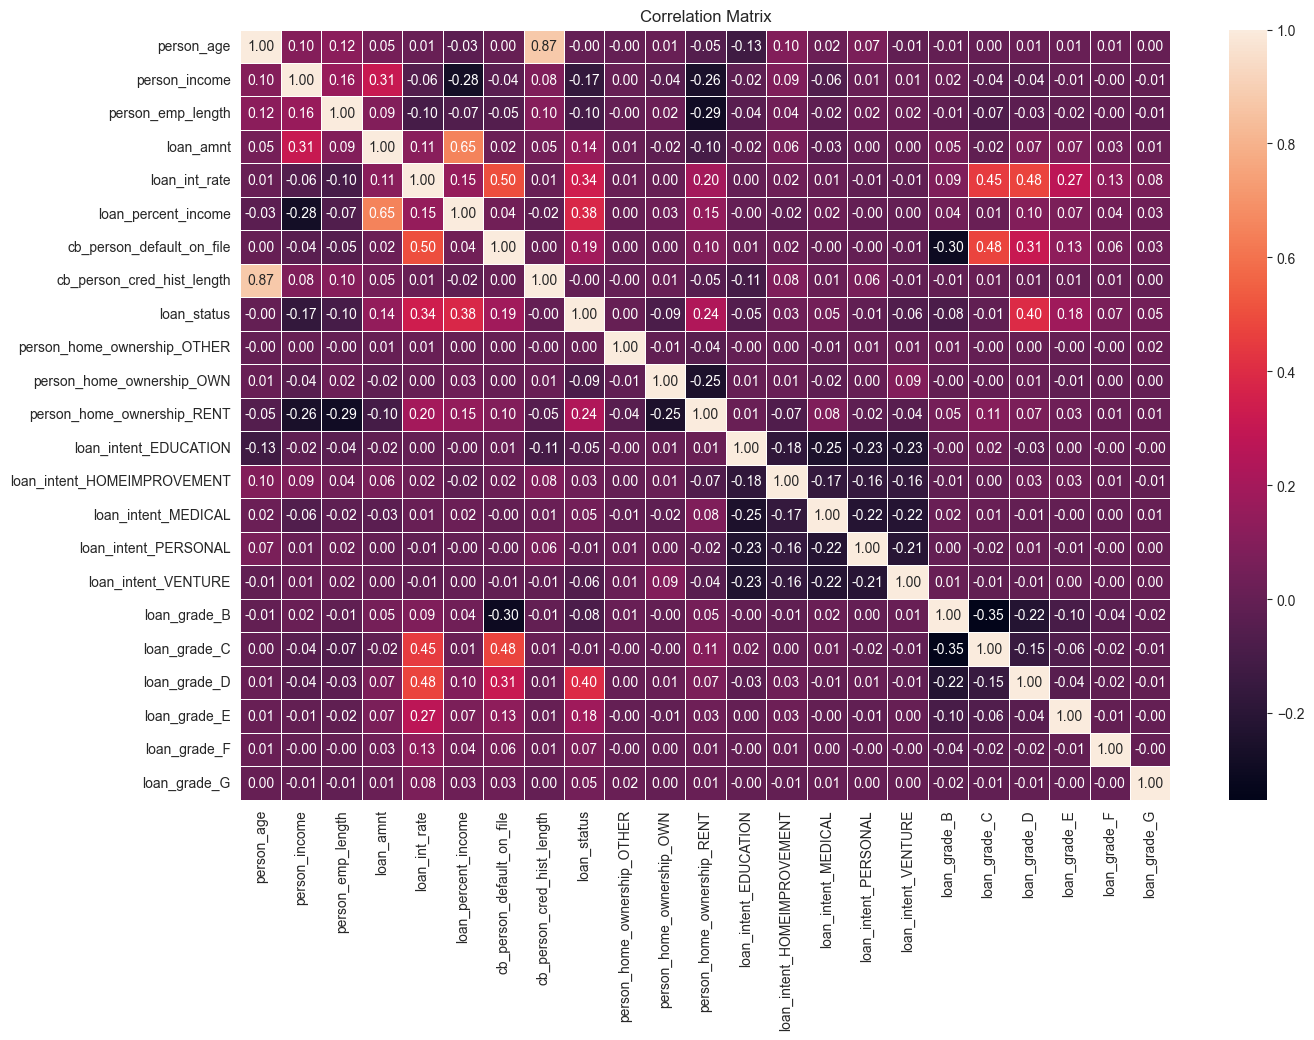

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Data Modelling and Evaluation

For each model used, there are some steps and techniques used in all of them:
- Pipelines
- Hyperparameter Tuning
- Cross Validation
- Classification Report
- Confusion Matrix

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

### Train Test Split for the Data

In [31]:
x = df.drop("loan_status", axis = 1)
y = df["loan_status"]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Logistic Regression Algorithm

In [33]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('logreg', LogisticRegression(max_iter=1000))  
])

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'logreg__C': [0.001, 0.01, 0.1, 1, 10],  
    'logreg__solver': ['liblinear', 'saga']  
}

# find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')  
grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy_lr = best_model.score(x_test, y_test)
print("Test Set Accuracy: {:.4f}".format(test_accuracy_lr))

# Using 5-Fold Cross-Validation directly
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, x, y, cv=cv, scoring='accuracy')
print("Cross-validation Accuracy (5 folds):", cv_scores)
print("Mean Cross-validation Accuracy: {:.4f}".format(np.mean(cv_scores)))

Best Hyperparameters: {'logreg__C': 0.1, 'logreg__solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.9124
Test Set Accuracy: 0.9116
Cross-validation Accuracy (5 folds): [0.90954046 0.91388865 0.91226874 0.9148265  0.91030778]
Mean Cross-validation Accuracy: 0.9122


In [34]:
y_pred = best_model.predict(x_test)  
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10087
           1       0.77      0.52      0.62      1642

    accuracy                           0.91     11729
   macro avg       0.85      0.75      0.79     11729
weighted avg       0.90      0.91      0.90     11729



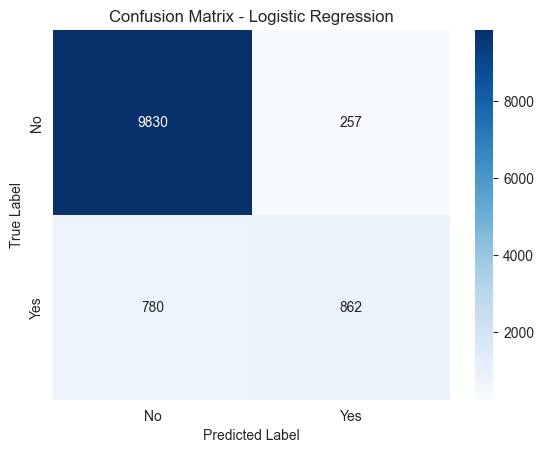

In [35]:
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

### K Nearest Neighbours

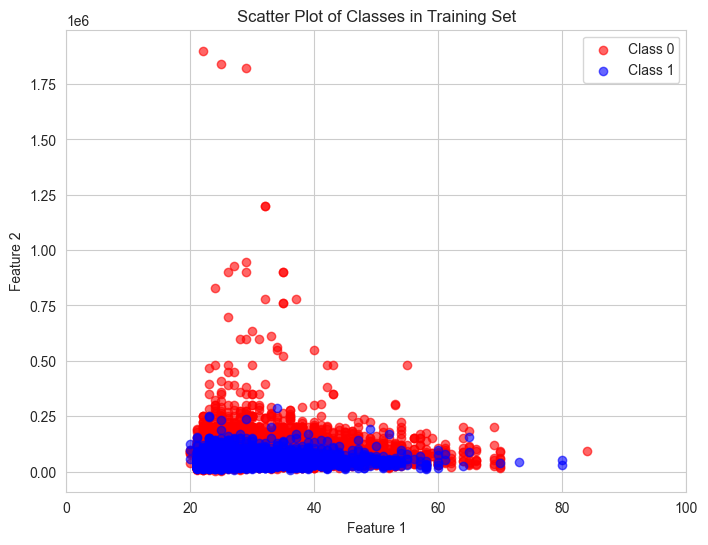

In [ ]:
if isinstance(x_train, pd.DataFrame):
    x_train = x_train.values

plt.figure(figsize=(8, 6))

plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], color='red', label='Class 0', alpha=0.6)
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], color='blue', label='Class 1', alpha=0.6)

plt.xlim(0,100)
plt.ylim(0,1250000)
plt.title('Scatter Plot of Classes in Training Set')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.show()

In [37]:
from sklearn.neighbors import KNeighborsClassifier

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsClassifier())  
])

param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7, 9, 11],  
    'knn__p': [1, 2],  
    'knn__weights': ['uniform', 'distance']  
}

# hyperparameter Tuning
grid_search_knn = GridSearchCV(pipeline_knn, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

print("Best Hyperparameters for KNN:", grid_search_knn.best_params_)
print("Best Cross-Validation Accuracy for KNN: {:.4f}".format(grid_search_knn.best_score_))

# Step 5: Evaluate the best model on the test set
best_knn_model = grid_search_knn.best_estimator_
test_accuracy_knn = best_knn_model.score(x_test, y_test)
print("Test Set Accuracy for KNN: {:.4f}".format(test_accuracy_knn))

# Step 6: Using 5-Fold Cross-Validation directly
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores_knn = cross_val_score(pipeline_knn, x, y, cv=cv, scoring='accuracy')
print("Cross-validation Accuracy (5 folds) for KNN:", cv_scores_knn)
print("Mean Cross-validation Accuracy for KNN: {:.4f}".format(np.mean(cv_scores_knn)))

Best Hyperparameters for KNN: {'knn__n_neighbors': 11, 'knn__p': 1, 'knn__weights': 'distance'}
Best Cross-Validation Accuracy for KNN: 0.9361
Test Set Accuracy for KNN: 0.9410
Cross-validation Accuracy (5 folds) for KNN: [0.9309404  0.93503282 0.93418024 0.936738   0.93418024]
Mean Cross-validation Accuracy for KNN: 0.9342


In [38]:
y_pred = best_model.predict(x_test) 
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10087
           1       0.77      0.52      0.62      1642

    accuracy                           0.91     11729
   macro avg       0.85      0.75      0.79     11729
weighted avg       0.90      0.91      0.90     11729



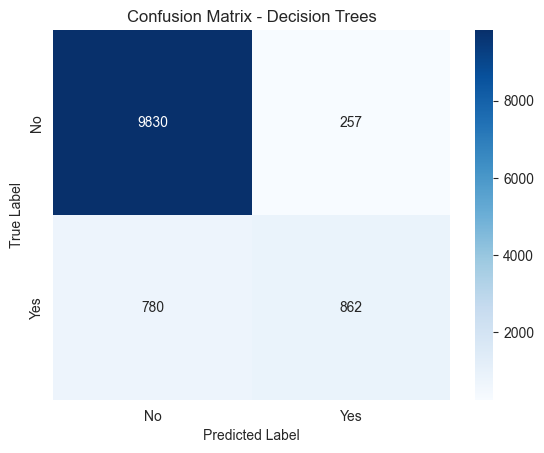

In [39]:
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Trees')
plt.show()

### Support Vector Machine

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('svm', SVC())  
])

param_grid = {
    'svm__C': [0.1, 1],
    'svm__kernel': ['linear', 'rbf'],  
    'svm__gamma': ['scale']  
}

# Hyperparameter Tuning
randomized_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_grid,
    n_iter=10,  
    cv=5,  
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  
)
randomized_search.fit(x_train, y_train)

# Get best parameters and score
print("Best Hyperparameters:", randomized_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(randomized_search.best_score_))

# Evaluate on the test set
best_model = randomized_search.best_estimator_
test_accuracy_svm = best_model.score(x_test, y_test)
print("Test Set Accuracy: {:.4f}".format(test_accuracy_svm))

# Using 5-Fold Cross-Validation directly
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, x, y, cv=cv, scoring='accuracy')
print("Cross-validation Accuracy (5 folds):", cv_scores)
print("Mean Cross-validation Accuracy: {:.4f}".format(np.mean(cv_scores)))


In [ ]:
y_pred = best_model.predict(x_test)  
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.91      0.66      0.77      1642

    accuracy                           0.94     11729
   macro avg       0.93      0.83      0.87     11729
weighted avg       0.94      0.94      0.94     11729



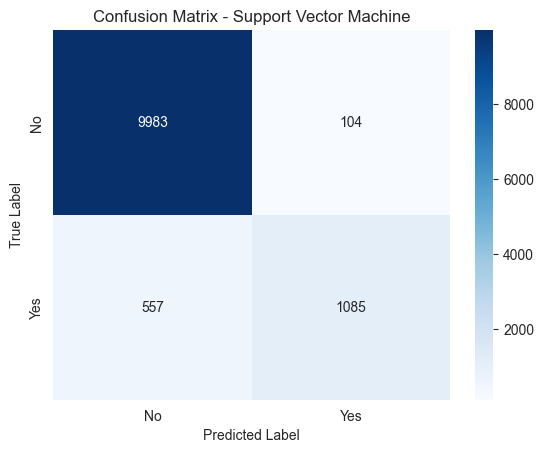

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Support Vector Machine')
plt.show()

### Decision Tree Algorithm

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('dt', DecisionTreeClassifier(random_state=42))  
])

param_dist = {
    'dt__max_depth': [3, 5, 10, 20, None],  
    'dt__min_samples_split': [2, 5, 10],  
    'dt__min_samples_leaf': [1, 2, 4],  
    'dt__criterion': ['gini', 'entropy'],  
}

# Hyperparamter Tuning
randomized_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=10,  
    cv=5, 
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  
)

randomized_search.fit(x_train, y_train)

# Get the best hyperparameters and score
print("Best Hyperparameters:", randomized_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(randomized_search.best_score_))

# Evaluate the best model on the test set
best_model = randomized_search.best_estimator_
test_accuracy_dt = best_model.score(x_test, y_test)
print("Test Set Accuracy: {:.4f}".format(test_accuracy_dt))

# Using 5-Fold Cross-Validation directly
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pipeline, x, y, cv=cv, scoring='accuracy')
print("Cross-validation Accuracy (5 folds):", cv_scores)
print("Mean Cross-validation Accuracy: {:.4f}".format(np.mean(cv_scores)))


Best Hyperparameters: {'dt__min_samples_split': 10, 'dt__min_samples_leaf': 1, 'dt__max_depth': 10, 'dt__criterion': 'entropy'}
Best Cross-Validation Accuracy: 0.9460
Test Set Accuracy: 0.9460
Cross-validation Accuracy (5 folds): [0.91312132 0.91576434 0.90919942 0.91243925 0.90988149]
Mean Cross-validation Accuracy: 0.9121


In [ ]:
y_pred = best_model.predict(x_test)  
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.89      0.70      0.78      1642

    accuracy                           0.95     11729
   macro avg       0.92      0.84      0.88     11729
weighted avg       0.94      0.95      0.94     11729



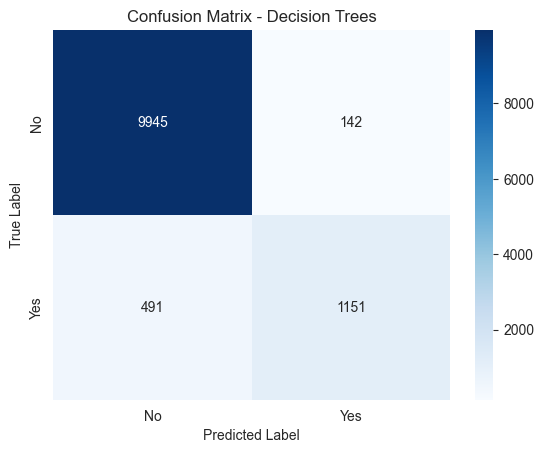

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Trees')
plt.show()

### Random Forest Algorithm

In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('rf', RandomForestClassifier(random_state=42))  
])

param_grid = {
    'rf__n_estimators': [100, 200, 300],  
    'rf__max_depth': [None, 10, 20, 30],  
    'rf__min_samples_split': [2, 5, 10],  
    'rf__min_samples_leaf': [1, 2, 4]
}

# hyperparameter Tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

grid_search.fit(x_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

test_accuracy_rf = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.4f}".format(test_accuracy_rf))

# Use 5-Fold Cross-Validation directly
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(best_model, x, y, cv=cv, scoring='accuracy')
print("Cross-validation Accuracy (5 folds):", cv_scores)
print("Mean Cross-validation Accuracy: {:.4f}".format(np.mean(cv_scores)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'rf__max_depth': None, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 300}
Best Cross-Validation Accuracy: 0.9500
Test Set Accuracy: 0.9521
Cross-validation Accuracy (5 folds): [0.94662802 0.95106147 0.94961207 0.95404553 0.95097621]
Mean Cross-validation Accuracy: 0.9505


In [ ]:
y_pred = best_model.predict(x_test) 
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_pred))


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.92      0.72      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729



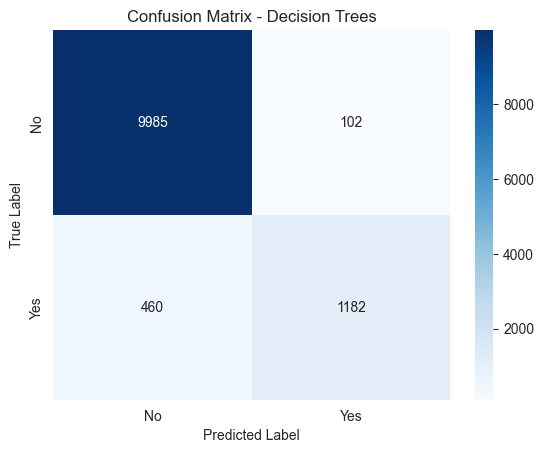

In [ ]:
cm_lr = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Decision Trees')
plt.show()

## Final Evaluation

After using 7 different models, the best model is now identified and will be used for future predictions.

In [ ]:

model_performance = {
    'Logistic Regression': test_accuracy_lr,  
    'K-Nearest Neighbors': test_accuracy_knn,  
    'Support Vector Machine': test_accuracy_svm,  
    'Decision Tree': test_accuracy_dt,  
    'Random Forest': test_accuracy_rf  
}

best_model_name = max(model_performance, key=model_performance.get)
best_accuracy = model_performance[best_model_name]

print(f"\nBest Model: {best_model_name} with Test Accuracy: {best_accuracy:.4f}")



Best Model: Random Forest with Test Accuracy: 0.9521
